In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Choose which fields to use.
def get_col_names(file_path):
  time_space = ['UTC_Start', 'G_LAT', 'G_LONG', 'G_ALT']
  names = pd.read_csv(file_path, skiprows=100, nrows=100).to_numpy()[:,0]
  col_names = time_space
  for item in names:
    if 'CAFS' in item and 'dnwFrac' not in item:
      col_names.append(item)
  return col_names

# Get the relevant data.
def get_data(file_path, col_names):
  pre_rows = int((pd.read_csv(file_path, nrows=1, header=None))[0])
  relevant_data = pd.read_csv(file_path, skiprows=pre_rows-1, index_col=0, parse_dates=[0], usecols=col_names, na_values='-99999.0')
  return relevant_data

# Get the date and times.
def get_date_time(file_path, data):
  date = file_path[-16:-8]
  date = f'{date[0:4]}-{date[4:6]}-{date[6:8]}'
  data['UTC_Start_dt'] = pd.to_datetime(data.index, unit='s', origin=date)
  data.index = data['UTC_Start_dt']
  return data

In [ ]:
# Tests on 1 file.
file_path = '/content/drive/MyDrive/Documents/AI4ER/PhD/Photolysis_data/ATom_MER10_Dataset.20210613/MER10_DC8_20160729_R35.ict'
'''
col_names = get_col_names(file_path)
print(len(col_names))
print(col_names)

data = get_data(file_path, col_names)
print(data.shape)
print(data[0:2])

data = get_date_time(file_path, data)
print(data[0:2])
'''

In [ ]:
# Compile all the photolysis data.
folder_path = '/content/drive/MyDrive/Documents/AI4ER/PhD/Photolysis_data/ATom_MER10_Dataset.20210613'
all_files = glob.glob(folder_path + '/*.ict')
all_data = []
for each_file in all_files:
   col_names = get_col_names(each_file)
   data = get_data(each_file, col_names)
   data = get_date_time(each_file, data)
   all_data.append(data)
all_data = pd.concat(all_data, axis=0)
all_data = all_data.drop(['UTC_Start_dt'], axis=1)

del col_names
del data


In [ ]:
# Make a .csv for easy viewing.
out_path = folder_path + '/photolysis_data.csv'
all_data.to_csv(out_path)

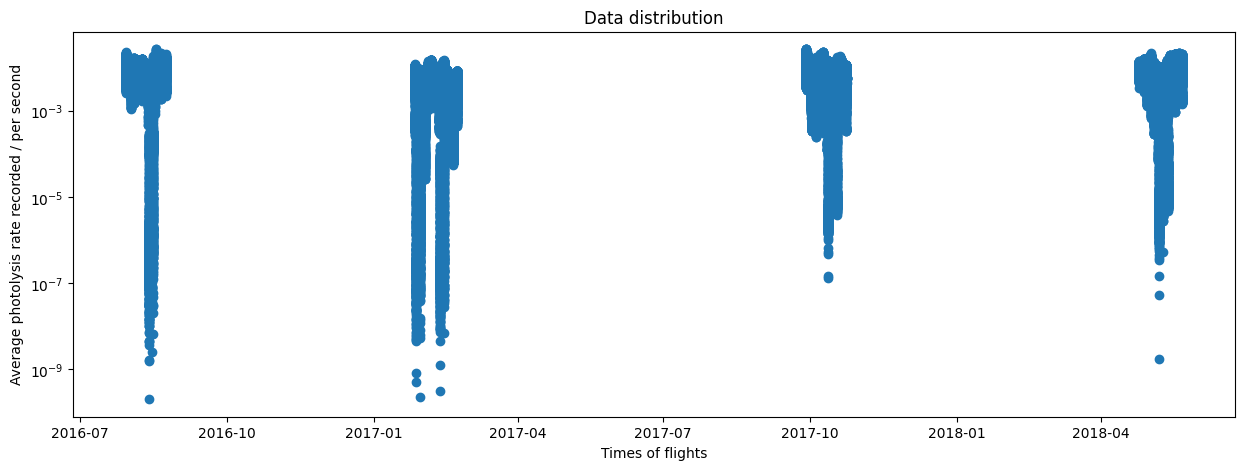

There were 10679 entries with no photolysis.


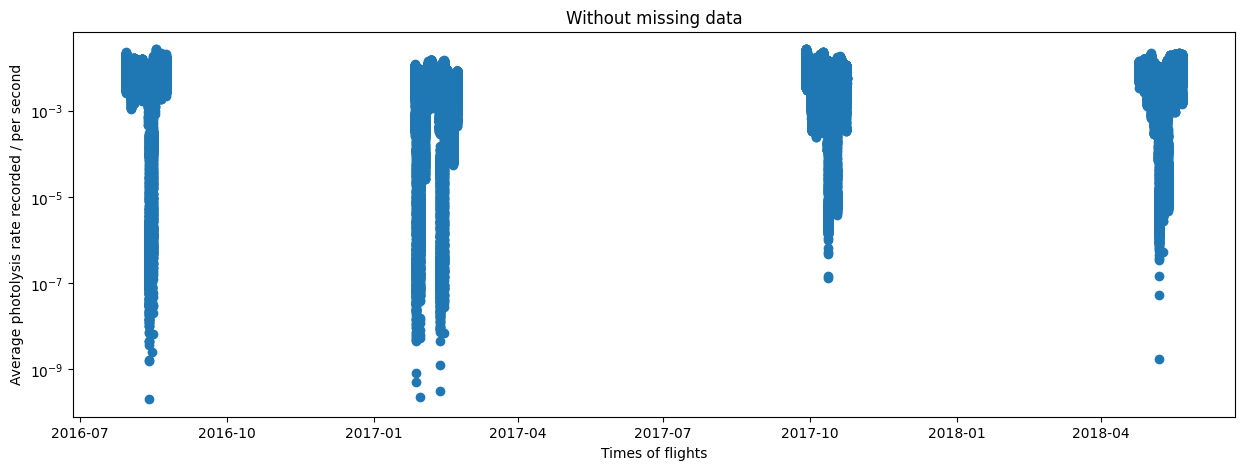

In [ ]:
def scatter(title, x, y, xlabel, ylabel, scale):
  plt.figure(figsize=(15, 5))
  plt.yscale(scale)
  plt.scatter(x, y)
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

# Separate spatial info from data for easier processing.
space_data = all_data.iloc[0, 0:3]
j_data = all_data.iloc[:, 4:-1]

# Show where there are no photolysis data.
title = 'Data distribution'
xlabel = 'Times of flights'
ylabel = 'Average photolysis rate recorded / per second'

x = all_data.index
y = j_data.mean(axis=1)
scatter(title, x, y, xlabel, ylabel, 'log')
#print(all_data.shape)

# Remove entries with no photolysis data but keep entries with some recorded and some missing.
no_empty_data = all_data.dropna(axis='rows', thresh=4)

#print(no_empty_data.shape)
#print(len(no_empty_data.index))

num_empties = len(all_data.index) - len(no_empty_data.index)
print("There were {} entries with no photolysis.".format(num_empties))

space_data = no_empty_data.iloc[0, 0:3]
j_data = no_empty_data.iloc[:, 4:-1]

title = 'Without missing data'
x = no_empty_data.index
y = j_data.mean(axis=1)
scatter(title, x, y, xlabel, ylabel, 'log')


In [ ]:
# Remove empty entries from csv.
out_path = folder_path + '/photolysis_data.csv'
no_empty_data.to_csv(out_path)

142693 negative values were found.

The smallest numbers are:
 jMAC_NoProductsSpecified_CAFS             -2.139323e-09
jMVK_NoProductsSpecified_CAFS             -9.179383e-09
jAcetone_CH3CO_CH3_CAFS                   -5.892033e-09
jMEK_CH3CO_CH2CH3_CAFS                    -2.227165e-08
jHydroxyacetone_CH3CO_CH3O_CAFS           -2.471936e-09
jHydroxyacetone_CH3COO_CH3_CAFS           -2.471936e-09
jCHOCHO_HCO_HCO_CAFS                      -2.614505e-08
jCHOCHO_H2_2CO_CAFS                       -2.005149e-08
jCHOCHO_CH2O_CO_CAFS                      -3.032936e-08
jCH3COCHO_CH3CO_HCO_CAFS                  -7.560872e-08
j23Butanedione_NoProductsSpecified_CAFS   -5.347400e-08
jCl2_Cl_Cl_CAFS                           -8.736500e-07
jClO_Cl_O3P_CAFS                          -3.481537e-07
jClNO2_Cl_NO2_CAFS                        -2.477252e-07
jClONO_Cl_NO2_CAFS                        -2.814867e-06
jClONO2_Cl_NO3_CAFS                       -2.040188e-08
jClONO2_ClO_NO2_CAFS                     

<ipython-input-5-ba1de5e00e1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_data[j_data < 0] = 0.0
<ipython-input-5-ba1de5e00e1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_data[j_data < 0] = 0.0


The largest numbers are:
 jMAC_NoProductsSpecified_CAFS              0.000019
jMVK_NoProductsSpecified_CAFS              0.000039
jAcetone_CH3CO_CH3_CAFS                    0.000003
jMEK_CH3CO_CH2CH3_CAFS                     0.000039
jHydroxyacetone_CH3CO_CH3O_CAFS            0.000004
jHydroxyacetone_CH3COO_CH3_CAFS            0.000004
jCHOCHO_HCO_HCO_CAFS                       0.000271
jCHOCHO_H2_2CO_CAFS                        0.000069
jCHOCHO_CH2O_CO_CAFS                       0.000122
jCH3COCHO_CH3CO_HCO_CAFS                   0.000633
j23Butanedione_NoProductsSpecified_CAFS    0.001007
jCl2_Cl_Cl_CAFS                            0.008568
jClO_Cl_O3P_CAFS                           0.000219
jClNO2_Cl_NO2_CAFS                         0.001140
jClONO_Cl_NO2_CAFS                         0.016067
jClONO2_Cl_NO3_CAFS                        0.000123
jClONO2_ClO_NO2_CAFS                       0.000026
jBr2_Br_Br_CAFS                            0.114296
jBrO_Br_O_CAFS                        

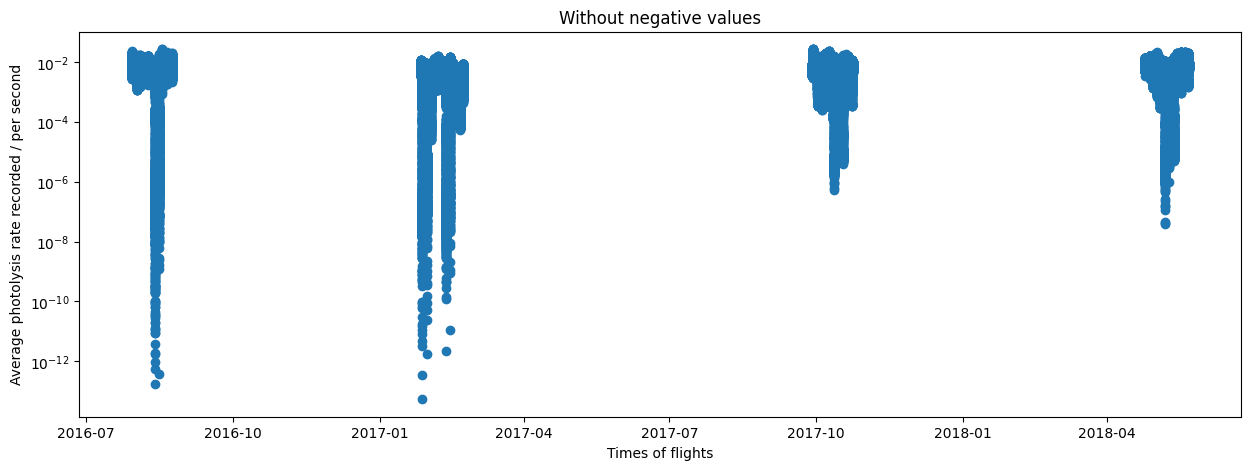

The smallest numbers are:
 jMAC_NoProductsSpecified_CAFS              7.610000e-14
jMVK_NoProductsSpecified_CAFS              6.577500e-14
jAcetone_CH3CO_CH3_CAFS                    4.500000e-14
jMEK_CH3CO_CH2CH3_CAFS                     5.364250e-13
jHydroxyacetone_CH3CO_CH3O_CAFS            3.375000e-14
jHydroxyacetone_CH3COO_CH3_CAFS            3.375000e-14
jCHOCHO_HCO_HCO_CAFS                       1.109000e-12
jCHOCHO_H2_2CO_CAFS                        2.260000e-13
jCHOCHO_CH2O_CO_CAFS                       2.984667e-12
jCH3COCHO_CH3CO_HCO_CAFS                   4.144667e-12
j23Butanedione_NoProductsSpecified_CAFS    2.322533e-11
jCl2_Cl_Cl_CAFS                            2.041000e-11
jClO_Cl_O3P_CAFS                           3.533333e-13
jClNO2_Cl_NO2_CAFS                         1.514425e-11
jClONO_Cl_NO2_CAFS                         5.214933e-11
jClONO2_Cl_NO3_CAFS                        7.840333e-13
jClONO2_ClO_NO2_CAFS                       4.423333e-13
jBr2_Br_Br_CAFS      

In [ ]:
# Check for outlying values.

# Check for negative values.
print((j_data < 0).sum().sum(), "negative values were found.\n")
#print(j_data[(j_data < 0).any(axis=1)])
print("The smallest numbers are:\n", j_data.min(axis=0))
# Since the negative numbers are so close to zero, I assume they are actually zero.
j_data[j_data < 0] = 0.0
print((j_data < 0).sum().sum(), "negative values \n")
# Check for unreasonably large numbers.
print("The largest numbers are:\n", j_data.max(axis=0))

title = "Without negative values"
x = j_data.index
y = j_data.mean(axis=1)
scatter(title, x, y, xlabel, ylabel, 'log')

print("The smallest numbers are:\n", j_data[j_data>0].min(axis=0))

In [ ]:
# Remove negative values from csv.
out_path = folder_path + '/photolysis_data.csv'
j_data.to_csv(out_path)

<ipython-input-10-e16d24770dbd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_data[j_data < 0] = 0.0
<ipython-input-10-e16d24770dbd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  j_data[j_data < 0] = 0.0


DatetimeIndex(['2017-01-29 17:39:30', '2017-01-29 17:39:40',
               '2017-01-29 17:39:50', '2017-01-29 17:40:00',
               '2017-01-29 17:40:10', '2017-01-29 17:40:20',
               '2017-01-29 17:40:30', '2017-01-29 17:40:40',
               '2017-01-29 17:40:50', '2017-01-29 17:41:00',
               ...
               '2017-01-30 03:20:10', '2017-01-30 03:20:20',
               '2017-01-30 03:20:30', '2017-01-30 03:20:40',
               '2017-01-30 03:20:50', '2017-01-30 03:21:00',
               '2017-01-30 03:21:10', '2017-01-30 03:21:20',
               '2017-01-30 03:21:30', '2017-01-30 03:21:40'],
              dtype='datetime64[ns]', name='UTC_Start_dt', length=3487, freq=None)


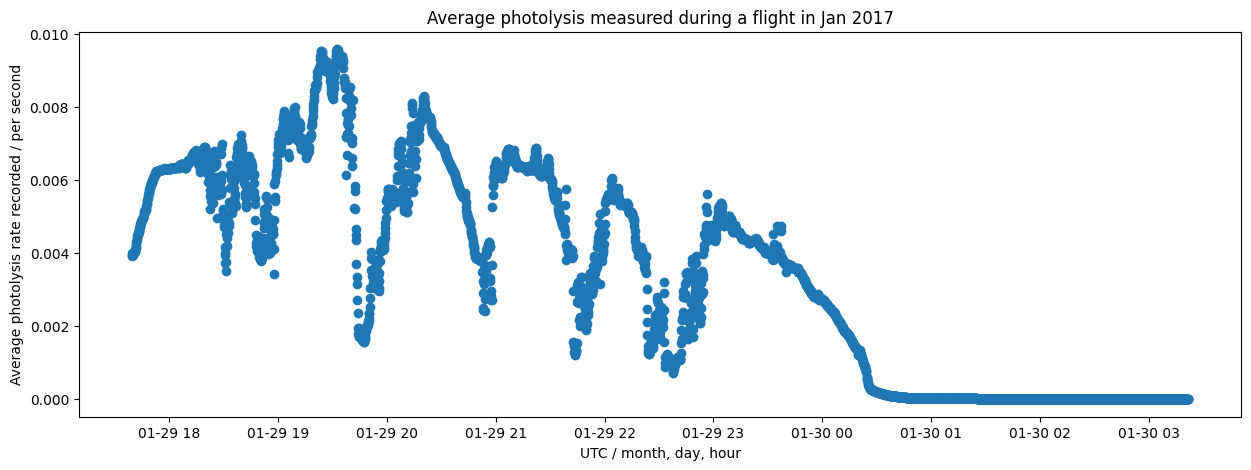

In [ ]:
# Look at rates during the progression of 1 flight of data.
file_path = '/content/drive/MyDrive/Documents/AI4ER/PhD/Photolysis_data/ATom_MER10_Dataset.20210613/MER10_DC8_20170129_R25.ict'
col_names = get_col_names(file_path)
data = get_data(file_path, col_names)
date, data = get_date_time(file_path, data)
data = data.drop(['UTC_Start_dt'], axis=1)
data = data.dropna(axis='rows', thresh=4)
space_data = data.iloc[0, 0:3]
j_data = data.iloc[:, 4:-1]
j_data[j_data < 0] = 0.0

print(j_data.index)

title = "Average photolysis measured during a flight in Jan 2017"
x = j_data.index
y = j_data.mean(axis=1)
xlabel = "UTC / month, day, hour"
scatter(title, x, y, xlabel, ylabel, 'linear')

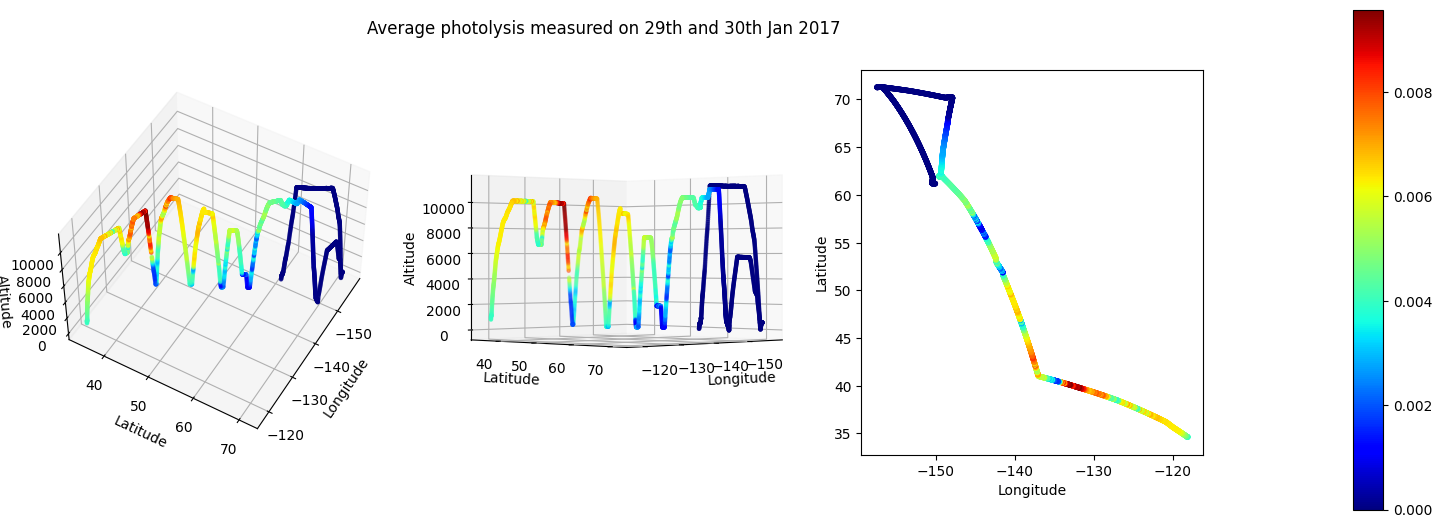

In [ ]:
# Plot an example of photolysis rates in space during 1 flight.
x = data['G_LONG']
y = data['G_LAT']
z = data['G_ALT']
j_avg = j_data.mean(axis=1)

fig = plt.figure(figsize=(15,5))

views=[(50,30), (0,45)]

fig.suptitle("Average photolysis measured on 29th and 30th Jan 2017")

for i in range(3):
  if i == 2:
    ax = fig.add_subplot(1, 3, i+1)
    pic = ax.scatter(x, y, c=j_avg, cmap='jet', marker='.')
  else:
    ax = fig.add_subplot(1, 3, i+1, projection="3d")
    ax.view_init(views[i][0], views[i][1])
    pic = ax.scatter(x, y, z, c=j_avg, cmap='jet', marker='.')
    ax.set_zlabel("Altitude")
  ax.set_xlabel("Longitude")
  ax.set_ylabel("Latitude")

plt.colorbar(pic, cax=fig.add_axes([1, 0, 0.02, 1]))
plt.show()

In [ ]:
del all_data
del no_empty_data
del j_data